### Fetch Data 

In [1]:
import pandas as pd
from imblearn.datasets import fetch_datasets

In [2]:
# Load data
data = fetch_datasets()['protein_homo']

# Prepare data in a pandas dataframe
data = pd.concat([
    pd.DataFrame(data.data),
    pd.Series(data.target)
], axis=1)

# Add column names
col_names = [str(i) for i in range(74)] +['target']
data.columns = col_names

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [4]:
data.to_csv('data/protein_data.csv', index=False)

### Accuracy 

In [5]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [6]:
data = pd.read_csv('data/protein_data.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [8]:
data.shape

(145751, 75)

In [9]:
data.target.value_counts()

0    144455
1      1296
Name: target, dtype: int64

In [10]:
# Imbalanced target
data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [11]:
# Train, test split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

In [12]:
X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [13]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [14]:
# Train the model - Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [15]:
# Logistic Regression
lr = LogisticRegression(random_state=0,  max_iter=1000)

lr.fit(X_train, y_train)

y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
# Accuracy score of all 3 models
print('Accuracy Baseline test: ', accuracy_score(y_test, y_test_base))
print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
print('Accuracy Logistic Regression test:', accuracy_score(y_test, lr.predict(X_test)))

Accuracy Baseline test:  0.9907377761514888
Accuracy Random Forest test: 0.9962951104605955
Accuracy Logistic Regression test: 0.9970040708045557


In [19]:
# Percentage of Minority Correctly Classified
def return_minority_perc(y_true, y_pred):
    return np.mean(np.where((y_true==1)&(y_pred==1),1,0))*100

print('% minority correctly classified, Baseline test: ', return_minority_perc(y_test, y_test_base))
print('% minority correctly classified, Random Forest test:', return_minority_perc(y_test, rf.predict(X_test)))
print('% minority correctly classified, Regression test:', return_minority_perc(y_test, lr.predict(X_test)))

% minority correctly classified, Baseline test:  0.0
% minority correctly classified, Random Forest test: 0.5580203997621552
% minority correctly classified, Regression test: 0.6655079357819146


### Precision - Recall 

In [20]:
!pip install yellowbrick

     |████████████████████████████████| 271 kB 4.9 MB/s eta 0:00:01


In [21]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

import warnings
warnings.filterwarnings("ignore")

In [22]:
data = pd.read_csv('data/protein_data.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

In [23]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [25]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

In [26]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [27]:
# Logistic Regression
lr = LogisticRegression(random_state=0,  max_iter=1000)

lr.fit(X_train, y_train)

y_train_logit = lr.predict_proba(X_train)[:,1]
y_test_logit = lr.predict_proba(X_test)[:,1]

#### Precision 

In [29]:
print('Precision Baseline test: ', precision_score(y_test, y_test_base))
print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test)))
print('Precision Logistic Regression test:', precision_score(y_test, lr.predict(X_test)))

Precision Baseline test:  0.0
Precision Random Forest test: 0.9959183673469387
Precision Logistic Regression test: 0.9448051948051948


#### Recall 

In [30]:
print('Recall Baseline test: ', recall_score(y_test, y_test_base, pos_label=1))
print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test), pos_label=1))
print('Recall Logistic Regression test:', recall_score(y_test, lr.predict(X_test), pos_label=1))

Recall Baseline test:  0.0
Recall Random Forest test: 0.6024691358024692
Recall Logistic Regression test: 0.7185185185185186


#### F1-Score 

In [31]:
print('F-measure Baseline test: ', f1_score(y_test, y_test_base, pos_label=1))
print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test), pos_label=1))
print('F-measure Logistic Regression test:', f1_score(y_test, lr.predict(X_test), pos_label=1))

F-measure Baseline test:  0.0
F-measure Random Forest test: 0.7507692307692309
F-measure Logistic Regression test: 0.8162692847124824


#### Classification Report 

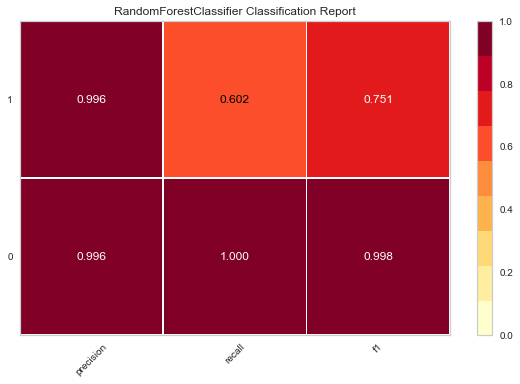

In [32]:
visualizer = ClassificationReport(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

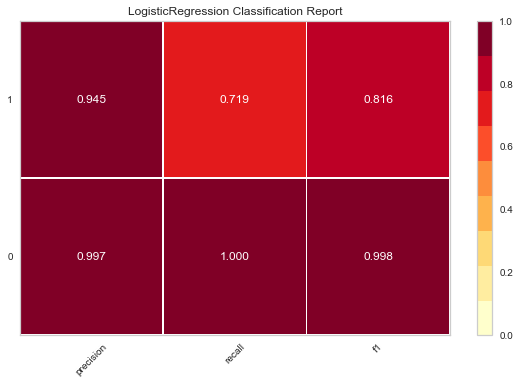

In [33]:
visualizer = ClassificationReport(lr)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

#### Precision, recall vs probability threshold 

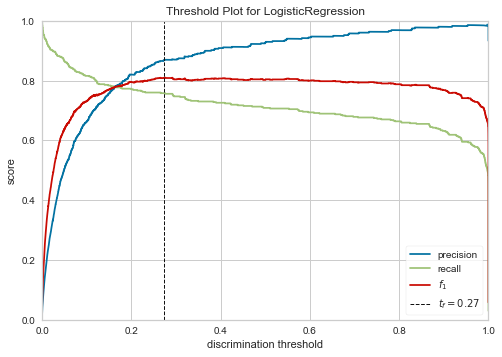

In [34]:
visualizer = DiscriminationThreshold(lr,
                                     n_trials=1,
                                     cv=0.5,
                                     argmax='fscore',
                                     random_state=0,
                                     is_fitted='auto',
                                     exclude = "queue_rate")

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

### Confusion Matrix 

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
# Baseline
confusion_matrix(y_test, y_test_base, labels=[0,1])

array([[43321,     0],
       [  405,     0]])

In [38]:
# Random Forest
confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])

array([[43320,     1],
       [  161,   244]])

In [40]:
# Logistic Regression
confusion_matrix(y_test, lr.predict(X_test), labels=[0,1])

array([[43304,    17],
       [  114,   291]])

#### FPR and FNR 

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR = fn / (tp + fn)

print('False Positive Rate, baseline: ', FPR)
print('False Negative Rate, baseline: ', FNR)

False Positive Rate, baseline:  0.0
False Negative Rate, baseline:  1.0


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Random Forests: ', FPR)
print('False Negative Rate, Random Forests: ', FNR)

False Positive Rate, Random Forests:  2.3083492994159875e-05
False Negative Rate, Random Forests:  0.39753086419753086


In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test), labels=[0,1]).ravel()

FPR = fp / (tn + fp)

FNR =  fn / (tp + fn)

print('False Positive Rate, Logistic Regression: ', FPR)
print('False Negative Rate, Logistic Regression: ', FNR)

False Positive Rate, Logistic Regression:  0.0003924193809007179
False Negative Rate, Logistic Regression:  0.2814814814814815


#### FPR and FNR vs Probability Threshold 

In [44]:
thresholds = np.linspace(0, 1, 100)

thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [45]:
fpr_ls = []
fnr_ls = []

# obtain probabilities
probs = lr.predict_proba(X_test)[:,1]

for threshold in thresholds:   
    
    # obtain class prediction based on threshold
    preds = np.where(probs>=threshold, 1, 0)
    
    # obtain confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, preds, labels=[0,1]).ravel()
    
    #  obtain FRP and FNR
    FPR = fp / (tn + fp)
    FNR =  fn / (tp + fn)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)
    
metrics = pd.concat([
    pd.Series(fpr_ls),
    pd.Series(fnr_ls)], axis=1)

metrics.columns = ['fpr', 'fnr']
metrics.index = thresholds

metrics.head()

,fpr,fnr
0.000000,1.000000,0.000000
0.010101,0.038388,0.066667
0.020202,0.019852,0.086420
0.030303,0.012811,0.103704
0.040404,0.009418,0.120988


Text(0.5, 1.0, 'FPR and FNR vs Discriminant Threshold')

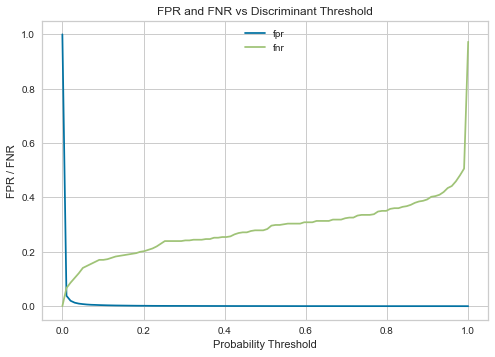

In [48]:
import matplotlib.pyplot as plt

metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('FPR / FNR')
plt.title('FPR and FNR vs Discriminant Threshold')

### Geometric Mean, Dominance, Index of Imbalanced Accuracy 

#### Geometric Mean 

In [50]:
from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

In [51]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, lr.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8474883821777829


#### Dominance 

In [52]:
def dominance(y_true, y_pred):
    tpr = recall_score(y_test, y_pred, pos_label=1)
    tnr = recall_score(y_test, y_pred, pos_label=0)
    return tpr - tnr

In [53]:
print('Dominance Baseline test: ', dominance(y_test, y_test_base))
print('Dominance Random Forest test:', dominance(y_test, rf.predict(X_test)))
print('Dominance Logistic Regression test:', dominance(y_test, lr.predict(X_test)))

Dominance Baseline test:  -1.0
Dominance Random Forest test: -0.39750778070453663
Dominance Logistic Regression test: -0.2810890621005807


#### Metrics vs Threshold 

Text(0.5, 1.0, 'Metrics vs Discriminant Threshold')

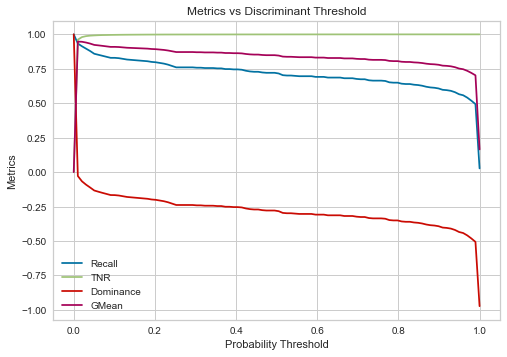

In [54]:
thresholds = np.linspace(0, 1, 100)

# list co collect values
recall_ls = []
tnr_ls = []
dominance_ls = []
gmean_ls = []

# obtain probabilities
probs_lr = lr.predict_proba(X_test)[:, 1]

# calculate G-Mean based on thresholds
for threshold in thresholds:

    # obtain class prediction based on threshold
    preds_lr = np.where(probs_lr >= threshold, 1, 0)

    # obtain metrics
    recall_ls.append(recall_score(y_test, preds_lr, pos_label=1))
    tnr_ls.append((recall_score(y_test, preds_lr, pos_label=0)))
    dominance_ls.append(dominance(y_test, preds_lr))
    gmean_ls.append(geometric_mean_score(y_test, preds_lr))


# after loop concatenate metrics
metrics = pd.concat([
    pd.Series(recall_ls),
    pd.Series(tnr_ls),
    pd.Series(dominance_ls),
    pd.Series(gmean_ls)], axis=1)

# add column names and thresholds in index
metrics.columns = ['Recall', 'TNR', 'Dominance', 'GMean']
metrics.index = thresholds

metrics.plot()
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.title('Metrics vs Discriminant Threshold')

#### Balanced Accuracy 

In [56]:
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    balanced_accuracy_score,
)

In [57]:
print('Corrected Accuracy Baseline test: ', balanced_accuracy_score(y_test, y_test_base))
print('Corrected Accuracy Random Forest test:', balanced_accuracy_score(y_test, rf.predict(X_test)))
print('Corrected Accuracy Logistic Regression test:', balanced_accuracy_score(y_test, lr.predict(X_test)))

Corrected Accuracy Baseline test:  0.5
Corrected Accuracy Random Forest test: 0.8012230261547375
Corrected Accuracy Logistic Regression test: 0.859063049568809


In [58]:
print('G-Mean Baseline test: ', geometric_mean_score(y_test, y_test_base))
print('G-Mean Random Forest test:', geometric_mean_score(y_test, rf.predict(X_test)))
print('G-Mean Logistic Regression test:', geometric_mean_score(y_test, lr.predict(X_test)))

G-Mean Baseline test:  0.0
G-Mean Random Forest test: 0.7761798945543448
G-Mean Logistic Regression test: 0.8474883821777829


In [60]:
from imblearn.metrics import (
    geometric_mean_score,
    make_index_balanced_accuracy,
)

In [62]:
gmean = make_index_balanced_accuracy(alpha=0.5, squared=True)(geometric_mean_score)

print('Corrected G-Mean Baseline test: ', gmean(y_test, y_test_base))
print('Corrected G-Mean Random Forest test:', gmean(y_test, rf.predict(X_test)))
print('Corrected G-Mean Logistic Regression test:', gmean(y_test, lr.predict(X_test)))

Corrected G-Mean Baseline test:  0.0
Corrected G-Mean Random Forest test: 0.6024552287103938
Corrected G-Mean Logistic Regression test: 0.7182365579263158
